In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt

Monthly deforestation notices

In [2]:
amazonas_monthly_deforestation_df = pd.read_csv('deter_amazonas_deforestation_2015_2024.csv', delimiter=',')
amazonas_monthly_deforestation_df

,year,month,area,uf,className,numPol
0,2021,7,1.11,AM,MINERACAO,14
1,2015,8,1.96,AM,MINERACAO,15
2,2021,9,2.16,AM,MINERACAO,14
3,2024,1,0.64,AM,MINERACAO,6
4,2024,10,0.09,AM,MINERACAO,1
...,...,...,...,...,...,...
262,2024,10,22.74,AM,DESMATAMENTO_CR,134
263,2018,7,128.39,AM,DESMATAMENTO_CR,591
264,2018,1,6.65,AM,DESMATAMENTO_CR,30
265,2024,8,92.14,AM,DESMATAMENTO_CR,424


In [3]:
amazonas_monthly_deforestation_df.rename(columns={'year': 'YEAR_NOTIF', 'month': 'MONTH_NOTIF', 'area': 'Amazonas_Total_Def_Area_km2', 'uf': 'UF'}, inplace=True)
amazonas_monthly_deforestation_df['Amazonas_Total_Def_Area_ha'] = amazonas_monthly_deforestation_df['Amazonas_Total_Def_Area_km2']*100
amazonas_monthly_deforestation_df

,YEAR_NOTIF,MONTH_NOTIF,Amazonas_Total_Def_Area_km2,UF,className,numPol,Amazonas_Total_Def_Area_ha
0,2021,7,1.11,AM,MINERACAO,14,111.0
1,2015,8,1.96,AM,MINERACAO,15,196.0
2,2021,9,2.16,AM,MINERACAO,14,216.0
3,2024,1,0.64,AM,MINERACAO,6,64.0
4,2024,10,0.09,AM,MINERACAO,1,9.0
...,...,...,...,...,...,...,...
262,2024,10,22.74,AM,DESMATAMENTO_CR,134,2274.0
263,2018,7,128.39,AM,DESMATAMENTO_CR,591,12839.0
264,2018,1,6.65,AM,DESMATAMENTO_CR,30,665.0
265,2024,8,92.14,AM,DESMATAMENTO_CR,424,9214.0


In [4]:
amazonas_monthly_deforestation_df = amazonas_monthly_deforestation_df[(2017 <= amazonas_monthly_deforestation_df.get('YEAR_NOTIF')) &
                                                                      (amazonas_monthly_deforestation_df.get('YEAR_NOTIF') <= 2021)]
amazonas_monthly_deforestation_df = amazonas_monthly_deforestation_df.sort_values(['YEAR_NOTIF', 'MONTH_NOTIF'])
#amazonas_monthly_deforestation_df = amazonas_monthly_deforestation_df.sort_values('MONTH_NOTIF')
amazonas_monthly_deforestation_df

,YEAR_NOTIF,MONTH_NOTIF,Amazonas_Total_Def_Area_km2,UF,className,numPol,Amazonas_Total_Def_Area_ha
176,2017,1,8.57,AM,DESMATAMENTO_CR,30,857.0
167,2017,2,3.90,AM,DESMATAMENTO_CR,24,390.0
160,2017,3,1.27,AM,DESMATAMENTO_CR,5,127.0
185,2017,4,18.18,AM,DESMATAMENTO_CR,28,1818.0
33,2017,5,0.23,AM,MINERACAO,2,23.0
...,...,...,...,...,...,...,...
147,2021,10,0.45,AM,DESMATAMENTO_VEG,1,45.0
212,2021,10,113.19,AM,DESMATAMENTO_CR,472,11319.0
209,2021,11,9.60,AM,DESMATAMENTO_CR,59,960.0
23,2021,12,0.18,AM,MINERACAO,2,18.0


In [5]:
grouped_amazonas_monthly_deforestation_df = amazonas_monthly_deforestation_df.groupby(['YEAR_NOTIF', 'MONTH_NOTIF']).sum().reset_index()
grouped_amazonas_monthly_deforestation_df

,YEAR_NOTIF,MONTH_NOTIF,Amazonas_Total_Def_Area_km2,numPol,Amazonas_Total_Def_Area_ha
0,2017,1,8.57,30,857.0
1,2017,2,3.90,24,390.0
2,2017,3,1.27,5,127.0
3,2017,4,18.18,28,1818.0
4,2017,5,74.31,175,7431.0
5,2017,6,187.25,515,18725.0
6,2017,7,80.31,268,8031.0
7,2017,8,49.16,189,4916.0
8,2017,9,20.56,85,2056.0
9,2017,10,69.78,283,6978.0


In [6]:
grouped_manaus_monthly_deforestation_df = grouped_amazonas_monthly_deforestation_df.assign(Manaus_Total_Def_Area_km2 = 
                                                                                          grouped_amazonas_monthly_deforestation_df.get('Amazonas_Total_Def_Area_km2')*2.917/100)

grouped_manaus_monthly_deforestation_df = grouped_manaus_monthly_deforestation_df.assign(Manaus_Total_Def_Area_ha = 
                                                                                          grouped_amazonas_monthly_deforestation_df.get('Amazonas_Total_Def_Area_ha')*2.917/100)

grouped_manaus_monthly_deforestation_df

,YEAR_NOTIF,MONTH_NOTIF,Amazonas_Total_Def_Area_km2,numPol,Amazonas_Total_Def_Area_ha,Manaus_Total_Def_Area_km2,Manaus_Total_Def_Area_ha
0,2017,1,8.57,30,857.0,0.249987,24.99869
1,2017,2,3.90,24,390.0,0.113763,11.37630
2,2017,3,1.27,5,127.0,0.037046,3.70459
3,2017,4,18.18,28,1818.0,0.530311,53.03106
4,2017,5,74.31,175,7431.0,2.167623,216.76227
5,2017,6,187.25,515,18725.0,5.462083,546.20825
6,2017,7,80.31,268,8031.0,2.342643,234.26427
7,2017,8,49.16,189,4916.0,1.433997,143.39972
8,2017,9,20.56,85,2056.0,0.599735,59.97352
9,2017,10,69.78,283,6978.0,2.035483,203.54826


In [7]:
grouped_manaus_monthly_deforestation_df['DATE'] = pd.to_datetime(
    grouped_manaus_monthly_deforestation_df['YEAR_NOTIF'].astype(str) + '-' + 
    grouped_manaus_monthly_deforestation_df['MONTH_NOTIF'].astype(str) + '-01'
)

grouped_manaus_monthly_deforestation_df

,YEAR_NOTIF,MONTH_NOTIF,Amazonas_Total_Def_Area_km2,numPol,Amazonas_Total_Def_Area_ha,Manaus_Total_Def_Area_km2,Manaus_Total_Def_Area_ha,DATE
0,2017,1,8.57,30,857.0,0.249987,24.99869,2017-01-01
1,2017,2,3.90,24,390.0,0.113763,11.37630,2017-02-01
2,2017,3,1.27,5,127.0,0.037046,3.70459,2017-03-01
3,2017,4,18.18,28,1818.0,0.530311,53.03106,2017-04-01
4,2017,5,74.31,175,7431.0,2.167623,216.76227,2017-05-01
5,2017,6,187.25,515,18725.0,5.462083,546.20825,2017-06-01
6,2017,7,80.31,268,8031.0,2.342643,234.26427,2017-07-01
7,2017,8,49.16,189,4916.0,1.433997,143.39972,2017-08-01
8,2017,9,20.56,85,2056.0,0.599735,59.97352,2017-09-01
9,2017,10,69.78,283,6978.0,2.035483,203.54826,2017-10-01


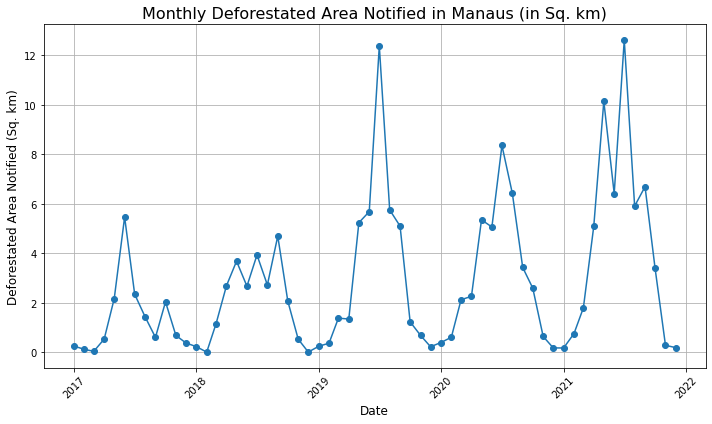

In [8]:
grouped_manaus_monthly_deforestation_df.set_index('DATE', inplace=True)

# Plot the continuous monthly deforestation area for Manaus
plt.figure(figsize=(10, 6))
plt.plot(grouped_manaus_monthly_deforestation_df.index, grouped_manaus_monthly_deforestation_df['Manaus_Total_Def_Area_km2'], marker='o')

# Add labels and title
plt.title('Monthly Deforestated Area Notified in Manaus (in Sq. km)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Deforestated Area Notified (Sq. km)', fontsize=12)

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()

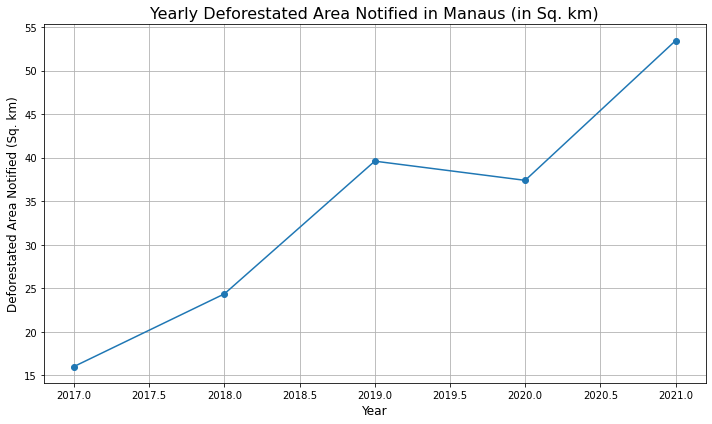

In [9]:
yearly_manaus_deforestation_df = grouped_manaus_monthly_deforestation_df.groupby(grouped_manaus_monthly_deforestation_df.index.year).sum()

# Plot the yearly deforestation area for Manaus
plt.figure(figsize=(10, 6))
plt.plot(yearly_manaus_deforestation_df.index, yearly_manaus_deforestation_df['Manaus_Total_Def_Area_km2'], marker='o')

# Add labels and title
plt.title('Yearly Deforestated Area Notified in Manaus (in Sq. km)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Deforestated Area Notified (Sq. km)', fontsize=12)

# Display the grid and plot
plt.grid(True)
plt.tight_layout()
plt.show()